# RMSE Prediction Model of Final Sale Prices of Houses

Vincent Luong

## Introduction

The *Final Sale Price* of a house can be determined by many factors and attributes of a house.  Given this dataset provided from Kaggle, we would like to determine whether we can accurately predict the final sale price of a house given these varaibles.

## Data

The Data is composed of 81 variables with n = 1460
 <br>
'Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice'

## Reading Data

In [1]:
#Library imports
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
train_dat = pd.read_csv('train.csv')
test_dat = pd.read_csv('test.csv')

#Describing Columns
train_dat.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
#Summary Statistics of Variables
train_dat.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#Shows first 6 rows of values
train_dat.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


## Data Wrangling

In [5]:
#Taking a look at datatypes
train_dat.dtypes[train_dat.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### Using matlab.pyplot to view Trends/Outliers for Each X vs SalePrice

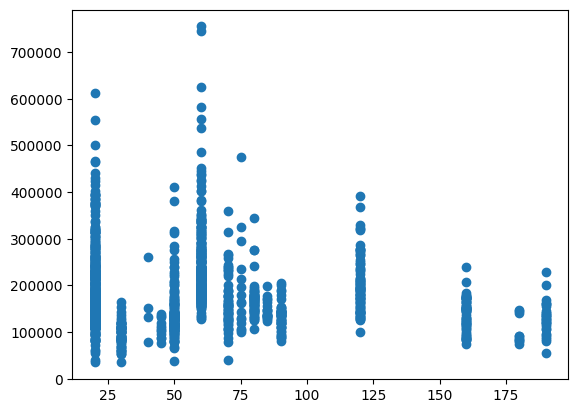

In [6]:
plt.scatter(x = 'MSSubClass', y = 'SalePrice', data=train_dat)

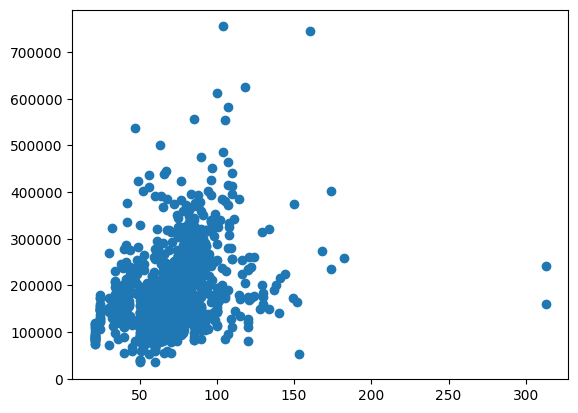

In [7]:
plt.scatter(x = 'LotFrontage', y = 'SalePrice', data = train_dat)

In [8]:
train_dat.query('LotFrontage > 300')
#There are outliers present from the LotFrontage vs SalePrice graph which can affect the RMSE of our model
#935 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


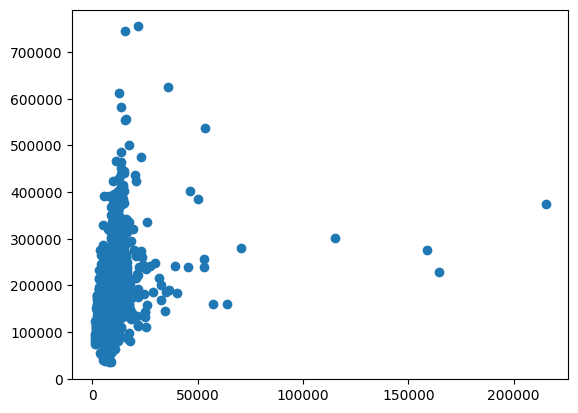

In [9]:
plt.scatter(x = 'LotArea', y = 'SalePrice', data = train_dat)
#250, 314, 336, 707

In [10]:
train_dat.query('LotArea > 55000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [11]:
#Compare highest z-score for Lot Area
stats.zscore(train_dat['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

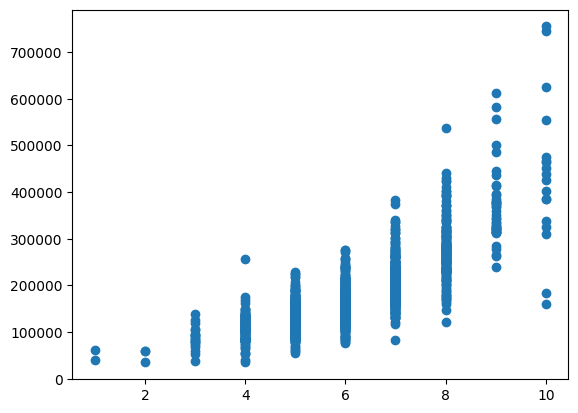

In [12]:
#Discrete Numerical Data
plt.scatter(x = 'OverallQual', y = 'SalePrice', data = train_dat)

In [13]:
train_dat.query('OverallQual == 10')
#524, 1299, 692, 1170

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


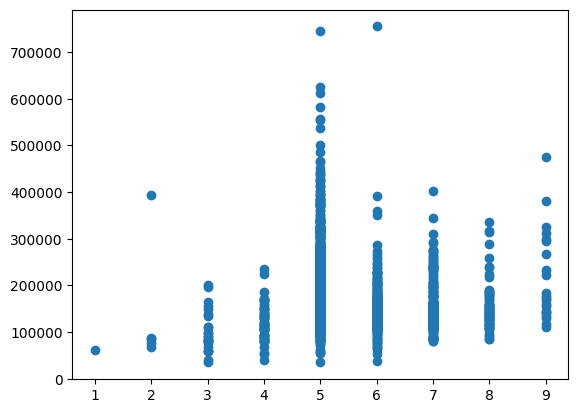

In [14]:
plt.scatter(x = 'OverallCond', y = 'SalePrice', data = train_dat)

In [15]:
train_dat.query('OverallCond == 2')
#379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [16]:
train_dat.query('OverallCond == 5 & SalePrice > 700000')
#1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [17]:
train_dat.query('OverallCond == 6 & SalePrice > 700000')
#692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


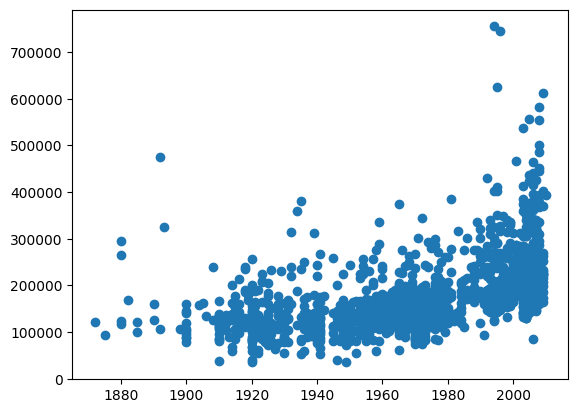

In [18]:
plt.scatter(x = 'YearBuilt', y = 'SalePrice', data = train_dat)

In [19]:
train_dat.query('YearBuilt < 1900 & SalePrice > 400000')
#186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [20]:
train_dat.query('YearBuilt < 2000 & SalePrice > 600000')
#692, 1170, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


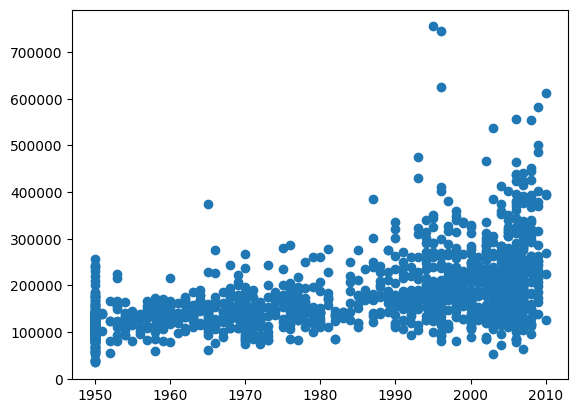

In [21]:
plt.scatter(x = 'YearRemodAdd', y = 'SalePrice', data = train_dat)

In [22]:
train_dat.query('YearRemodAdd < 1970 & SalePrice > 300000')
#314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [23]:
train_dat.query('YearRemodAdd < 2000 & SalePrice > 600000')
#692, 1170, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


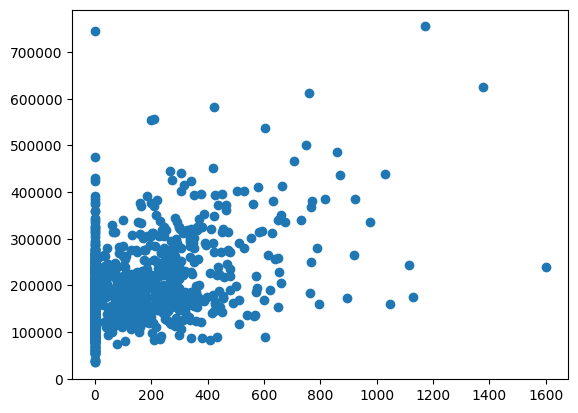

In [24]:
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data = train_dat)

In [25]:
train_dat.query('MasVnrArea == 0 & SalePrice > 600000')
#1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [26]:
train_dat.query('MasVnrArea > 1500')
#298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


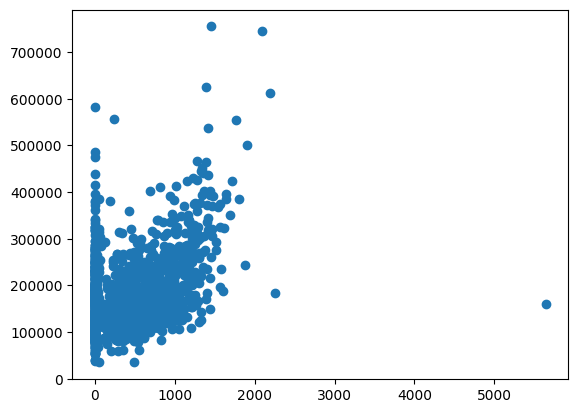

In [27]:
plt.scatter(x = 'BsmtFinSF1', y = 'SalePrice', data = train_dat)

In [28]:
train_dat.query('BsmtFinSF1 > 5000')
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


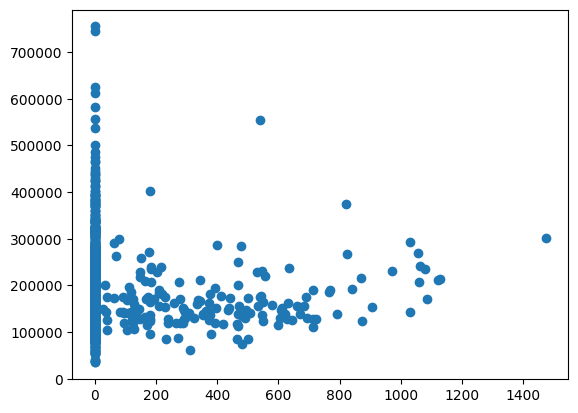

In [29]:
plt.scatter(x = 'BsmtFinSF2', y = 'SalePrice', data = train_dat)

In [30]:
train_dat.query('BsmtFinSF2 > 400 & SalePrice > 500000')
#441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


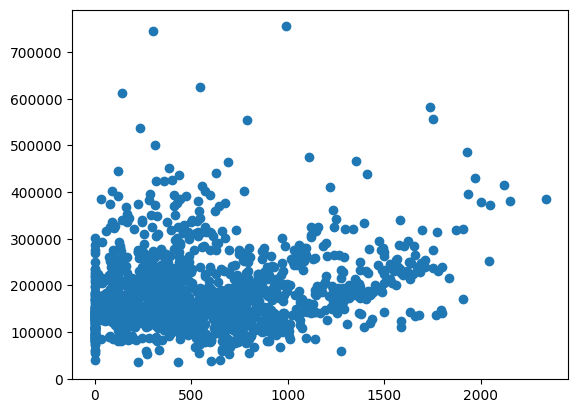

In [31]:
plt.scatter(x = 'BsmtUnfSF', y = 'SalePrice', data = train_dat)

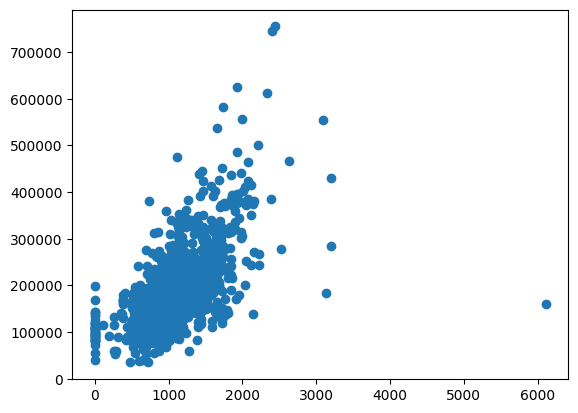

In [32]:
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = train_dat)

In [33]:
train_dat.query('TotalBsmtSF > 5000')
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


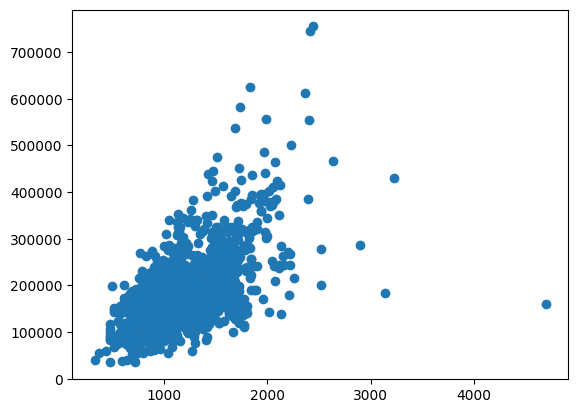

In [34]:
plt.scatter(x = '1stFlrSF', y = 'SalePrice', data = train_dat)

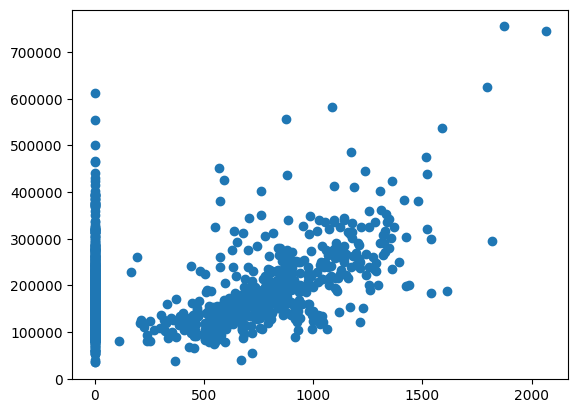

In [35]:
plt.scatter(x = '2ndFlrSF', y = 'SalePrice', data = train_dat)

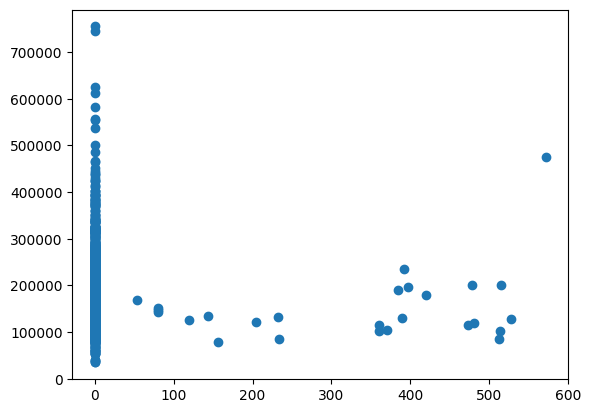

In [36]:
plt.scatter(x = 'LowQualFinSF', y = 'SalePrice', data = train_dat)

In [37]:
train_dat.query('LowQualFinSF > 500')
#186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
170,171,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1009,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000


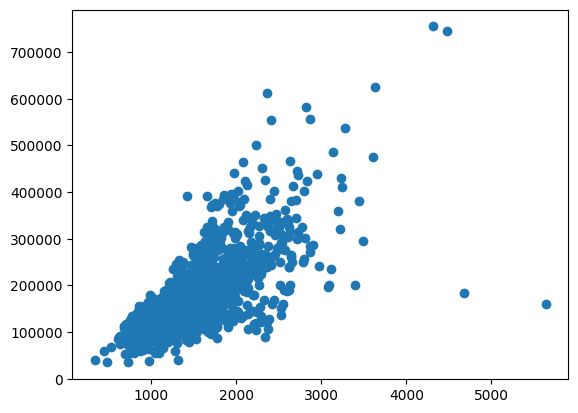

In [38]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = train_dat)

In [39]:
train_dat.query('GrLivArea > 4400')
#524, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


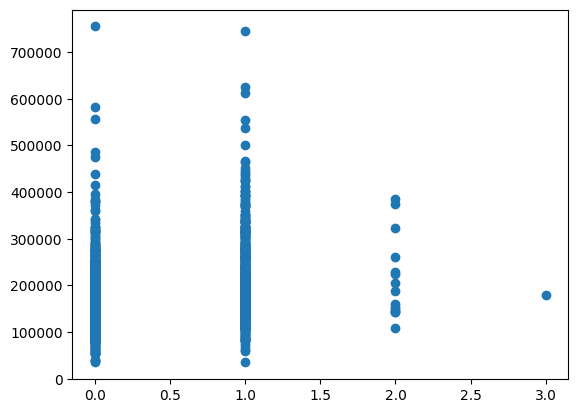

In [40]:
plt.scatter(x = 'BsmtFullBath', y = 'SalePrice', data = train_dat)

In [41]:
train_dat.query('BsmtFullBath == 3')
#739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


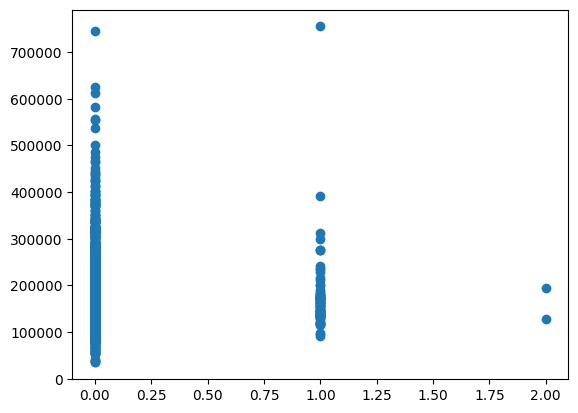

In [42]:
plt.scatter(x = 'BsmtHalfBath', y = 'SalePrice', data = train_dat)

In [43]:
stats.zscore(train_dat['BsmtHalfBath']).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [44]:
train_dat.query('BsmtHalfBath == 2')
#598, 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


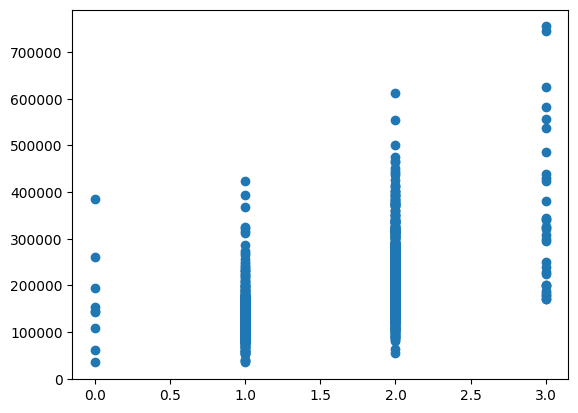

In [45]:
plt.scatter(x = 'FullBath', y = 'SalePrice', data = train_dat)

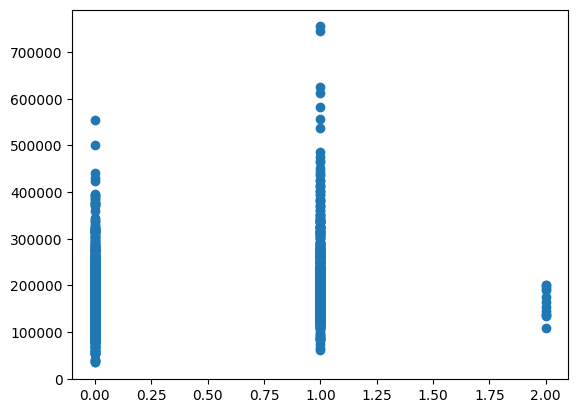

In [46]:
plt.scatter(x = 'HalfBath', y = 'SalePrice', data = train_dat)

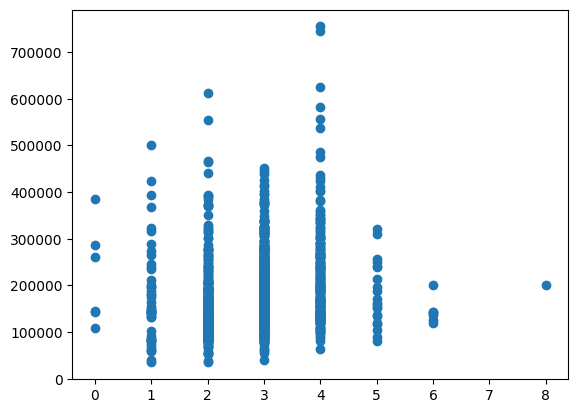

In [47]:
plt.scatter(x = 'BedroomAbvGr', y = 'SalePrice', data = train_dat)

In [48]:
train_dat.query('BedroomAbvGr == 8')
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


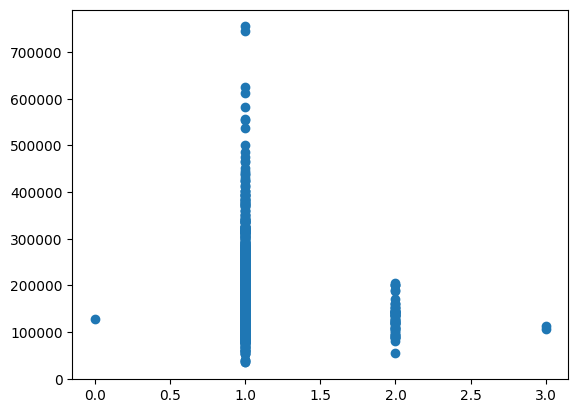

In [49]:
plt.scatter(x = 'KitchenAbvGr', y = 'SalePrice', data = train_dat)

In [50]:
train_dat.query('KitchenAbvGr == 3')
#49, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


In [51]:
train_dat.query('KitchenAbvGr == 0')
#955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


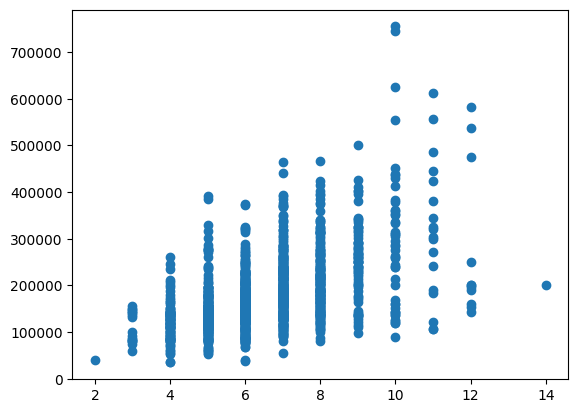

In [52]:
plt.scatter(x = 'TotRmsAbvGrd', y = 'SalePrice', data = train_dat)

In [53]:
train_dat.query('TotRmsAbvGrd == 14')
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


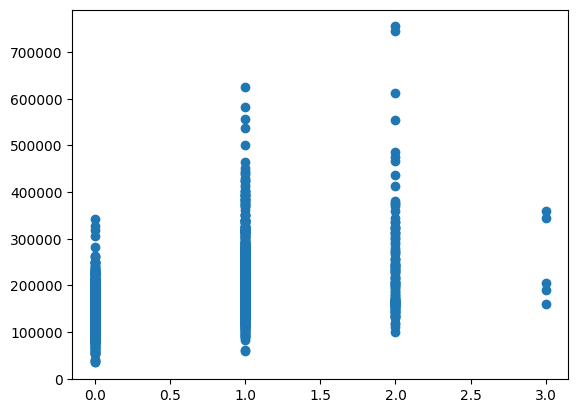

In [54]:
plt.scatter(x = 'Fireplaces', y = 'SalePrice', data = train_dat)

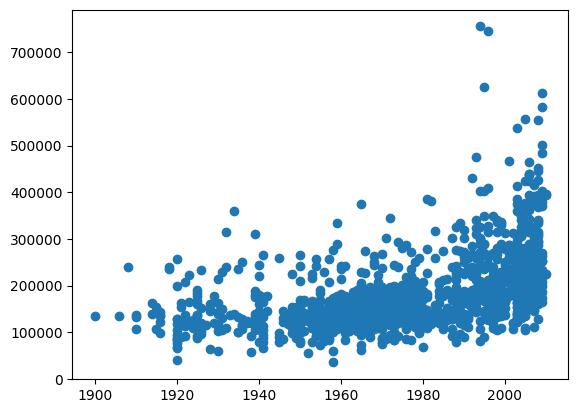

In [55]:
plt.scatter(x = 'GarageYrBlt', y = 'SalePrice', data = train_dat)

In [56]:
train_dat.query('GarageYrBlt > 1980 & SalePrice > 650000')
#692, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


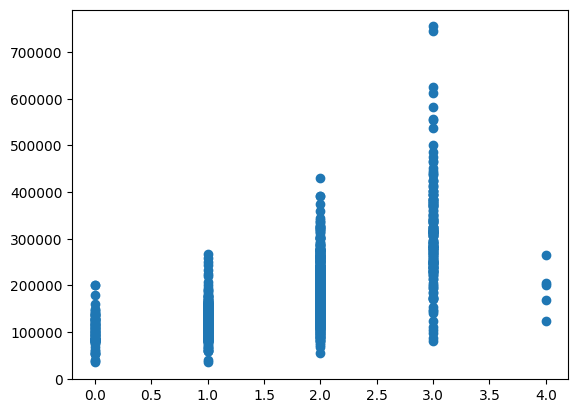

In [57]:
plt.scatter(x = 'GarageCars', y = 'SalePrice', data = train_dat)

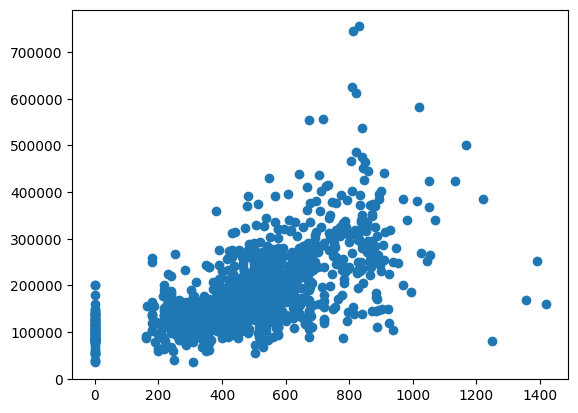

In [58]:
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = train_dat)

In [59]:
train_dat.query('GarageArea > 1200')
#1062, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


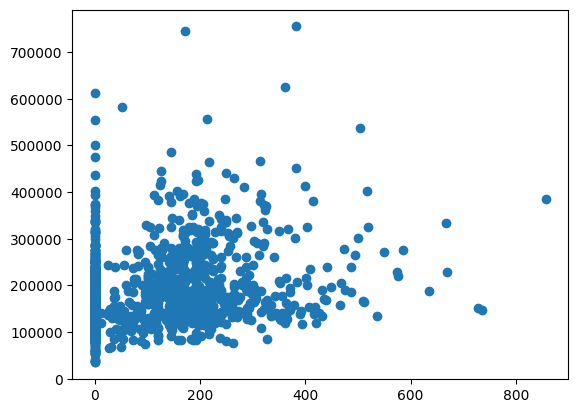

In [60]:
plt.scatter(x = 'WoodDeckSF', y = 'SalePrice', data = train_dat)

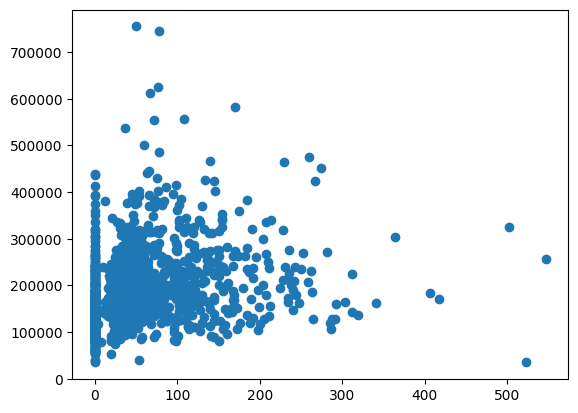

In [61]:
plt.scatter(x = 'OpenPorchSF', y = 'SalePrice', data = train_dat)

In [62]:
train_dat.query('OpenPorchSF > 500')
#496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


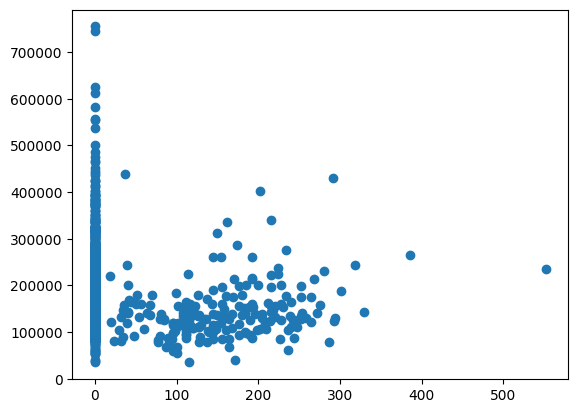

In [63]:
plt.scatter(x = 'EnclosedPorch', y = 'SalePrice', data = train_dat)

In [64]:
train_dat.query('EnclosedPorch > 500')
#198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


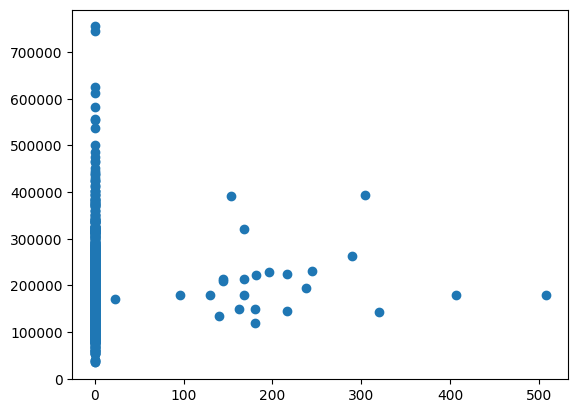

In [65]:
plt.scatter(x = '3SsnPorch', y = 'SalePrice', data = train_dat)

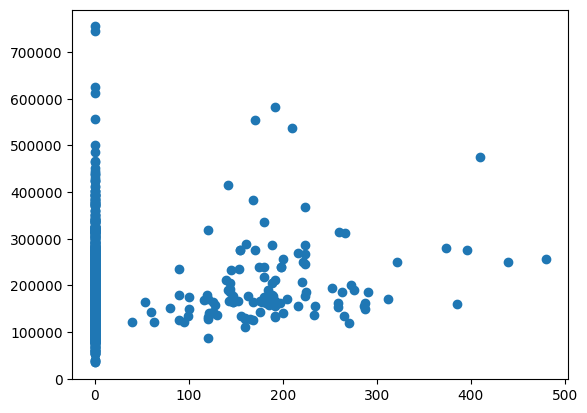

In [66]:
plt.scatter(x = 'ScreenPorch', y = 'SalePrice', data = train_dat)

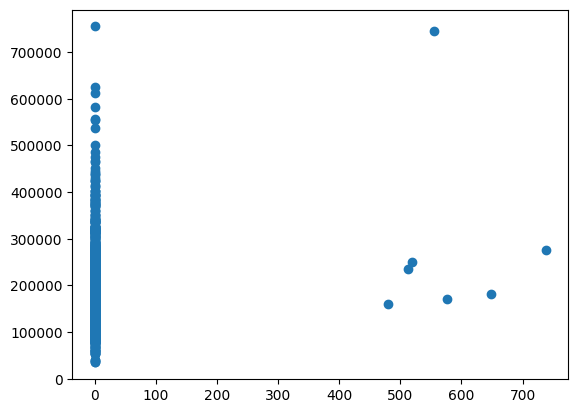

In [67]:
plt.scatter(x = 'PoolArea', y = 'SalePrice', data = train_dat)

In [68]:
values = [935, 1299, 250, 314, 336, 707, 524, 692, 1190, 379, 1183, 186, 1170, 298, 441, 186, 739, 598, 955, 636, 49, 810, 1062, 496, 198]
#values

In [69]:
#Remove data values
train_dat = train_dat[train_dat.Id.isin(values) == False]

In [70]:
#Checking out missing values from variables
pd.DataFrame(train_dat.isnull().sum().sort_values(ascending = False)).head(20)

,0
PoolQC,1432
MiscFeature,1385
Alley,1347
Fence,1160
MasVnrType,859
FireplaceQu,683
LotFrontage,256
GarageYrBlt,76
GarageCond,76
GarageType,76


In [71]:
train_dat['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [72]:
train_dat['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [73]:
#Replace missing Alley Data for No
train_dat['Alley'].fillna('No', inplace = True)
test_dat['Alley'].fillna('No', inplace = True)

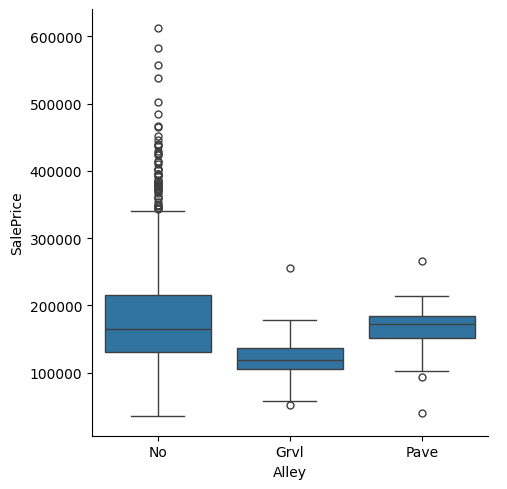

In [74]:
sns.catplot(data = train_dat, x = "Alley", y = "SalePrice", kind = "box")

The boxplot for the categorical variable `Alley` shows that the different Alley types are relatively similiar

In [75]:
train_dat.query('Alley == "Grvl"').count()

Id               50
MSSubClass       50
MSZoning         50
LotFrontage      47
LotArea          50
                 ..
MoSold           50
YrSold           50
SaleType         50
SaleCondition    50
SalePrice        50
Length: 81, dtype: int64

In [76]:
train_dat.query('Alley == "Pave"').count()

Id               39
MSSubClass       39
MSZoning         39
LotFrontage      37
LotArea          39
                 ..
MoSold           39
YrSold           39
SaleType         39
SaleCondition    39
SalePrice        39
Length: 81, dtype: int64

In [77]:
train_dat['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [78]:
#Replace missing Fence Data for No
train_dat['Fence'].fillna('No', inplace = True)
test_dat['Fence'].fillna('No', inplace = True)

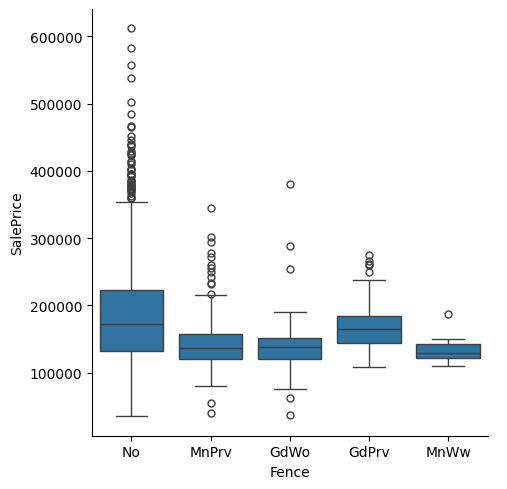

In [79]:
sns.catplot(data = train_dat, x = "Fence", y = "SalePrice", kind = "box")

In [80]:
train_dat['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [81]:
#Replace missing MasVnrType Data for No
train_dat['MasVnrType'].fillna('No', inplace = True)
test_dat['MasVnrType'].fillna('No', inplace = True)

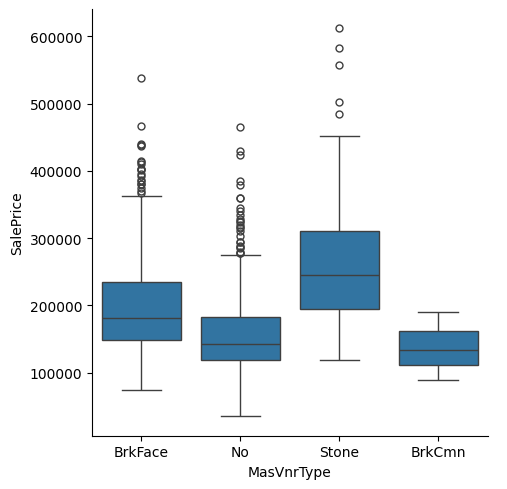

In [82]:
sns.catplot(data = train_dat, x = "MasVnrType", y = "SalePrice", kind = "box")

In [83]:
train_dat['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [84]:
#Replace missing FireplaceQu
train_dat['FireplaceQu'].fillna('No', inplace = True)
test_dat['FireplaceQu'].fillna('No', inplace = True)

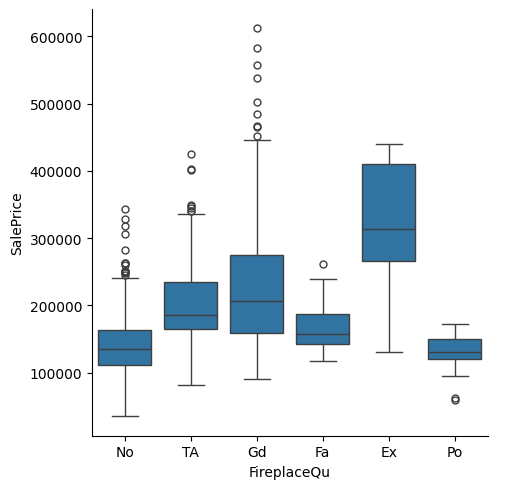

In [85]:
sns.catplot(data = train_dat, x = "FireplaceQu", y = "SalePrice", kind = "box")

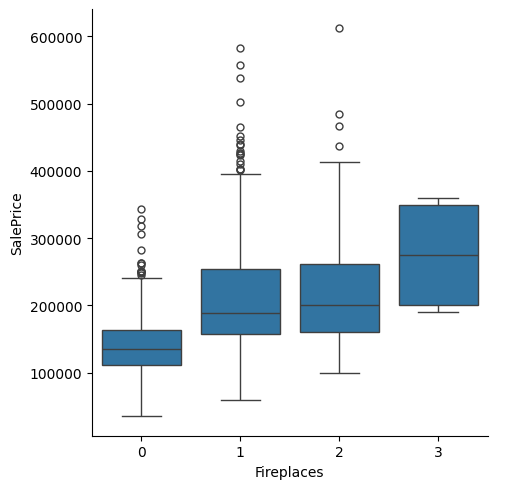

In [86]:
sns.catplot(data = train_dat, x = "Fireplaces", y = "SalePrice", kind = "box")

In [87]:
train_dat['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,  83.,
        43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38., 109.,
       130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 114., 128.,
       149., 168., 182., 138., 152., 124., 153.,  46.])

In [88]:
#Replace missing LotFrontage
train_dat['LotFrontage'].fillna(0, inplace = True)
test_dat['LotFrontage'].fillna(0, inplace = True)

In [89]:
train_dat['GarageYrBlt'].corr(train_dat['YearBuilt'])

0.8278556309226216

Since the garage year is highly correlated with the year that the house was built, we can drop `GarageYrBlt`.

In [90]:
train_dat['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [91]:
#Replace Missing values
train_dat['GarageCond'].fillna('No', inplace = True)
test_dat['GarageCond'].fillna('No', inplace = True)

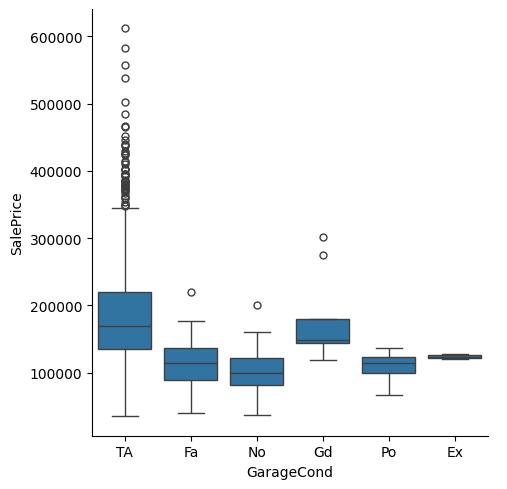

In [92]:
sns.catplot(data = train_dat, x = "GarageCond", y = "SalePrice", kind = "box")

In [93]:
train_dat['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [94]:
#Replace Missing values
train_dat['GarageType'].fillna('No', inplace = True)
test_dat['GarageType'].fillna('No', inplace = True)

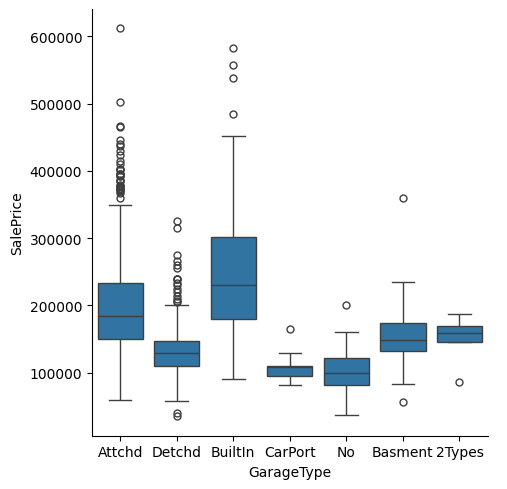

In [95]:
sns.catplot(data = train_dat, x = "GarageType", y = "SalePrice", kind = "box")

In [96]:
train_dat['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [97]:
#Replace Missing values
train_dat['GarageFinish'].fillna('No', inplace = True)
test_dat['GarageFinish'].fillna('No', inplace = True)

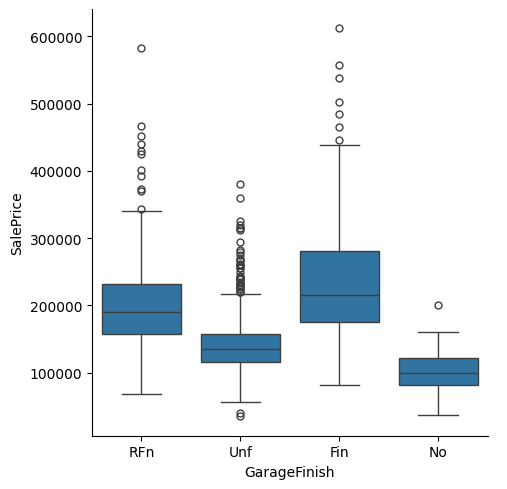

In [98]:
sns.catplot(data = train_dat, x = "GarageFinish", y = "SalePrice", kind = "box")

In [99]:
train_dat['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [100]:
#Replace Missing values
train_dat['GarageQual'].fillna('No', inplace = True)
test_dat['GarageQual'].fillna('No', inplace = True)

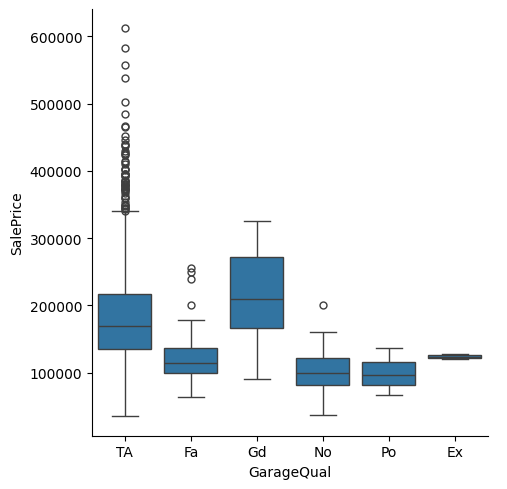

In [101]:
sns.catplot(data = train_dat, x = "GarageQual", y = "SalePrice", kind = "box")

In [102]:
train_dat['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [103]:
#Replace Missing values
train_dat['BsmtFinType2'].fillna('Unf', inplace = True)
test_dat['BsmtFinType2'].fillna('Unf', inplace = True)

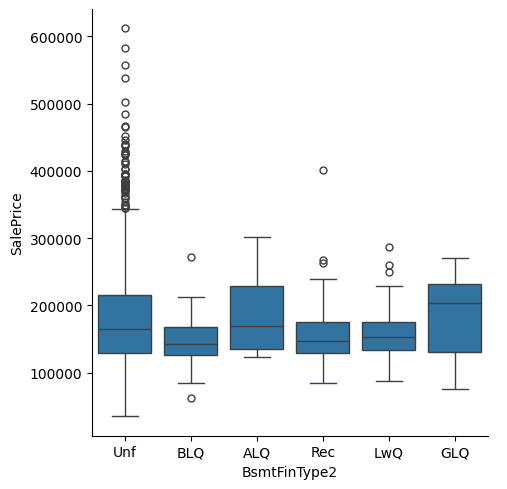

In [104]:
sns.catplot(data = train_dat, x = "BsmtFinType2", y = "SalePrice", kind = "box")

In [105]:
train_dat['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [106]:
#Replace Missing values
train_dat['BsmtExposure'].fillna('No', inplace = True)
test_dat['BsmtExposure'].fillna('No', inplace = True)

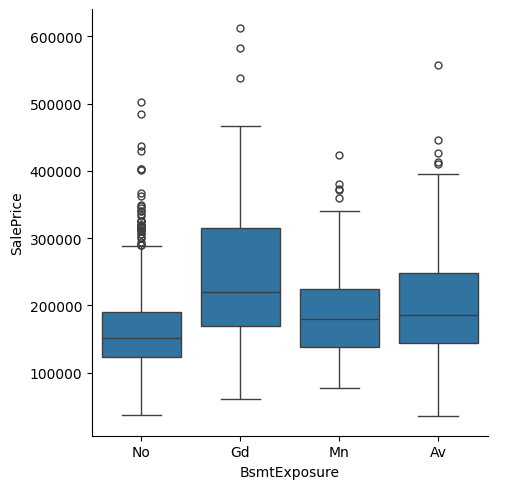

In [107]:
sns.catplot(data = train_dat, x = "BsmtExposure", y = "SalePrice", kind = "box")

In [108]:
train_dat['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [109]:
train_dat['BsmtQual'].fillna('No', inplace = True)
test_dat['BsmtQual'].fillna('No', inplace = True)

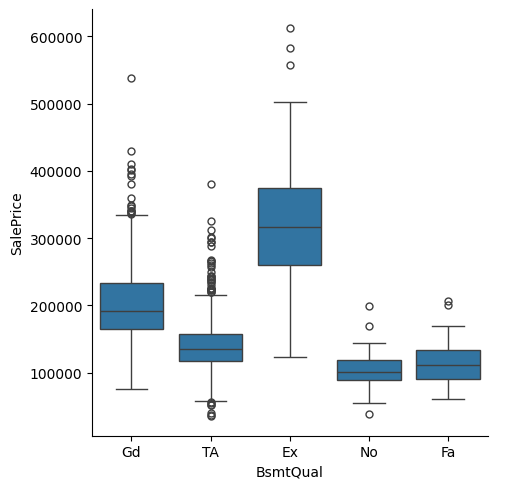

In [110]:
sns.catplot(data = train_dat, x = "BsmtQual", y = "SalePrice", kind = "box")

In [111]:
train_dat['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [112]:
train_dat['BsmtCond'].fillna('No', inplace = True)
test_dat['BsmtCond'].fillna('No', inplace = True)

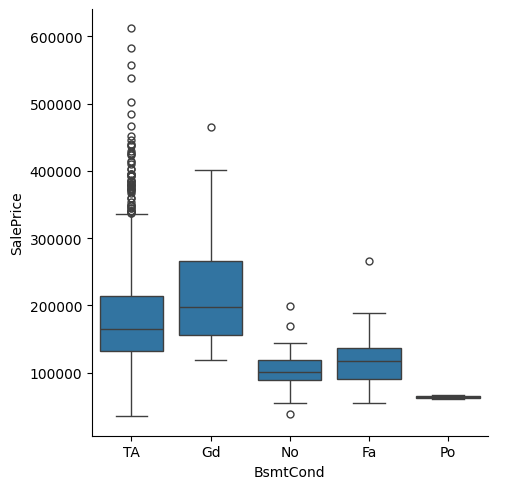

In [113]:
sns.catplot(data = train_dat, x = "BsmtCond", y = "SalePrice", kind = "box")

In [114]:
train_dat['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [115]:
train_dat['BsmtFinType1'].fillna('Unf', inplace = True)
test_dat['BsmtFinType1'].fillna('Unf', inplace = True)

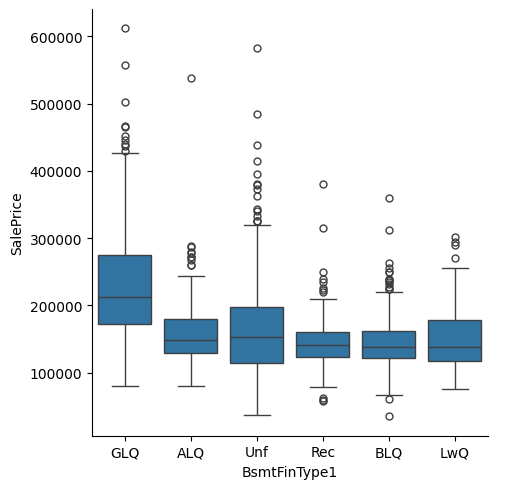

In [116]:
sns.catplot(data = train_dat, x = "BsmtFinType1", y = "SalePrice", kind = "box")

In [117]:
#Replace missing MasVnrArea for 0 area
train_dat['MasVnrArea'].fillna(0, inplace = True)
test_dat['MasVnrArea'].fillna(0, inplace = True)

In [118]:
#Replace missing value
train_dat['Electrical'].fillna('SBrkr', inplace = True)
test_dat['Electrical'].fillna('SBrkr', inplace = True)

## Dropping Uncessary Features

In [119]:
train_dat = train_dat.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_dat = test_dat.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

Too many missing values for `PoolQC`, `MiscFeature`, `Alley`, `Fence`; adds a lot of variance in our prediction model

`GarageYrBlt`, `GarageCond`, and `BsmtFinType2` all have other similar categories, therefore can drop.

## Data Mutation

In [120]:
train_dat['houseage'] = train_dat['YrSold'] - train_dat['YearBuilt']
test_dat['houseage'] = test_dat['YrSold'] - test_dat['YearBuilt']

In [121]:
train_dat['houseremodelage'] = train_dat['YrSold'] - train_dat['YearRemodAdd']
test_dat['houseremodelage'] = test_dat['YrSold'] - test_dat['YearRemodAdd']

In [122]:
test_dat['totalsf'] = test_dat['1stFlrSF'] + test_dat['2ndFlrSF'] + test_dat['BsmtFinSF1'] + test_dat['BsmtFinSF2']
test_dat['totalsf'] = test_dat['1stFlrSF'] + test_dat['2ndFlrSF'] + test_dat['BsmtFinSF1'] + test_dat['BsmtFinSF2']

In [123]:
train_dat['totalarea'] = train_dat['GrLivArea'] + train_dat['TotalBsmtSF']
test_dat['totalarea'] = test_dat['GrLivArea'] + test_dat['TotalBsmtSF']

In [125]:
train_dat['totalbath'] = train_dat['BsmtFullBath'] + train_dat['FullBath'] + 0.5*(train_dat['BsmtHalfBath'] + train_dat['HalfBath'])
test_dat['totalbath'] = test_dat['BsmtFullBath'] + test_dat['FullBath'] + 0.5*(test_dat['BsmtHalfBath'] + test_dat['HalfBath'])

In [127]:
train_dat['totalporchsf'] = train_dat['OpenPorchSF'] + train_dat['3SsnPorch'] + train_dat['EnclosedPorch'] +  train_dat['ScreenPorch'] + train_dat['WoodDeckSF']
test_dat['totalporchsf'] = test_dat['OpenPorchSF'] + test_dat['3SsnPorch'] + test_dat['EnclosedPorch'] +  test_dat['ScreenPorch'] + test_dat['WoodDeckSF']

In [128]:
train_dat = train_dat.drop(columns = ['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF',
                                     'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])
test_dat = test_dat.drop(columns = ['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF',
                                     'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])                

## Correlation Matrix

<Axes: >

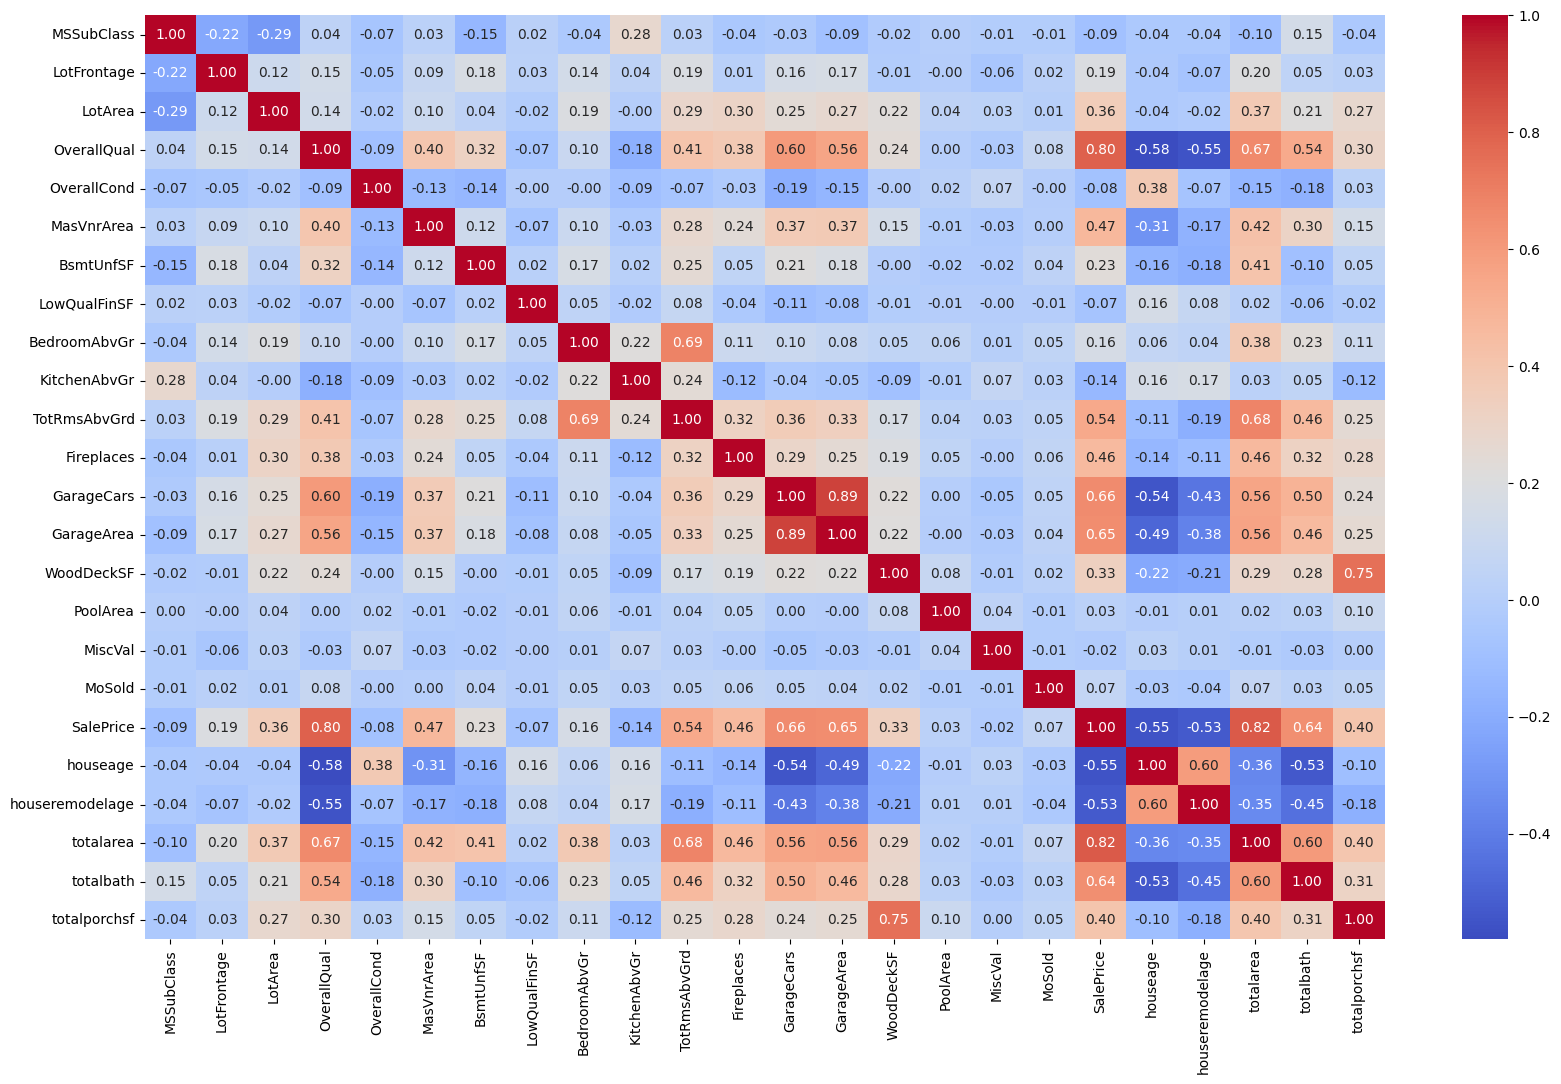

In [130]:
correlation_matrix = train_dat.corr(numeric_only = True)
plt.figure(figsize = (20,12))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

We can drop `GarageArea` or `GarageCars` Since they are both highly correlated